In [1]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.sequence import pad_sequences #error1
from keras.layers.embeddings import Embedding 
from keras.layers import Flatten
import matplotlib.pyplot as plt
from keras import callbacks

In [2]:
df = pd.read_csv('imdb_master.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
y = df['label'].values

   Unnamed: 0  type                                             review label  \
0           0  test  Once again Mr. Costner has dragged out a movie...   neg   
1           1  test  This is an example of why the majority of acti...   neg   
2           2  test  First of all I hate those moronic rappers, who...   neg   
3           3  test  Not even the Beatles could write songs everyon...   neg   
4           4  test  Brass pictures (movies is not a fitting word f...   neg   

          file  
0      0_2.txt  
1  10000_4.txt  
2  10001_1.txt  
3  10002_3.txt  
4  10003_3.txt  


In [3]:
#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
max_review_len = max([len(s.split()) for s in sentences])
print('Max review len:',max_review_len)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size:',vocab_size)

Max review len: 2470
Vocabulary size: 176408


In [4]:
#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)
#Make the same length
padded_docs = pad_sequences(sentences, maxlen=max_review_len)

In [5]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=0) #error3

In [6]:
model = Sequential()
model.add(Embedding(2000, 50, input_length=2470))
model.add(Flatten())
model.add(layers.Dense(300,input_dim=2470, activation='relu')) #error2
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 121s 412ms/step - loss: 0.9668 - acc: 0.4952 - val_loss: 0.8602 - val_acc: 0.5082
Epoch 2/5
293/293 [==============================] - 124s 423ms/step - loss: 0.8370 - acc: 0.5307 - val_loss: 0.8421 - val_acc: 0.5176
Epoch 3/5
293/293 [==============================] - 120s 411ms/step - loss: 0.8126 - acc: 0.5466 - val_loss: 0.8406 - val_acc: 0.5171
Epoch 4/5
293/293 [==============================] - 117s 400ms/step - loss: 0.7952 - acc: 0.5623 - val_loss: 0.8464 - val_acc: 0.5130
Epoch 5/5
293/293 [==============================] - 121s 414ms/step - loss: 0.7745 - acc: 0.5820 - val_loss: 0.8592 - val_acc: 0.5003


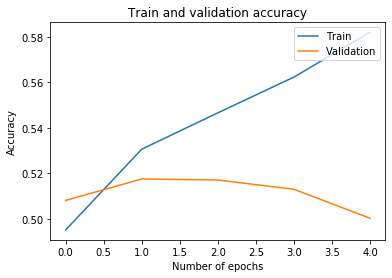

In [7]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train and validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

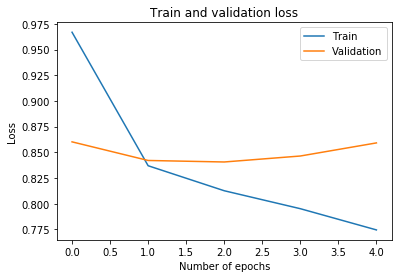

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train and validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [9]:
import numpy as np
pred = model.predict(X_test)
print(np.argmax(pred[1000]))
print(y_test[1000])

1
1
